# Домашнее задание №3 - Реализация базового варианта линейной регрессии

## Часть 1. Ваша реализация (60 баллов)

В этой части домашки вам предстоит **реализовать класс LinearRegressionSGD**, который обучает линейную регрессию методом стохастического градиентного спуска (SGD). Класс должен поддерживать **L1, L2 и Elastic Net регуляризацию**. Помимо этого, необходимо реализовать методы для **визуализации процесса обучения**: график функции потерь по эпохам и распределение ошибок на той или иной эпохе.

Ниже представлен шаблон кода с пропусками, которые необходимо заполнить.


* вычисление лосса (15 баллов)
* изменения в функции fit (25 баллов)
* predict (5 баллов)
* графики (15 баллов)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000, reg_type=None, reg_lambda=0.01, alpha=0.5):
        """
        Initialize the Linear Regression model with SGD.
        :param lr: Learning rate
        :param epochs: Number of training epochs
        :param reg_type: Regularization type ('l1', 'l2', 'elastic_net', or None)
        :param reg_lambda: Regularization strength
        :param alpha: Mixing parameter for elastic net (0: L2, 1: L1)
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.alpha = alpha
        self.theta =  None # self.theta =   # Инициализация коэффициентов нулями
        self.loss_history = []
        self.error_history = []
    
    def _compute_loss(self, X, y):
        """Compute MSE loss with regularization."""
        m = len(y)
        predictions = X.dot(self.theta)
        
        loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        
        if self.reg_type == 'l2':
            loss += self.reg_lambda * np.sum(self.theta ** 2) / 2
        elif self.reg_type == 'l1':
            loss += self.reg_lambda * np.sum(np.abs(self.theta[1:]))
        elif self.reg_type == 'elastic_net':
            l1 = np.sum(np.abs(self.theta[1:]))
            l2 = np.sum(self.theta ** 2) / 2
            loss += self.reg_lambda * (self.alpha * l1 + (1 - self.alpha) * l2)
        
        return loss
    
    def fit(self, X, y):
        """Train the model using stochastic gradient descent."""
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for epoch in range(self.epochs): #На каждой эпохе модель проходит через все примеры, но в случайном порядке (стохастический градиентный спуск).
            errors = []
            for i in range(m):
                idx = np.random.randint(0, m)
                xi, yi = X[idx], y[idx]
                prediction = np.dot(xi, self.theta)
                error = prediction - yi
                errors.append(error)
                
                # Compute gradient
                gradient = xi * error
                if self.reg_type == 'l2':
                    gradient += self.reg_lambda * self.theta
                elif self.reg_type == 'l1':
                    gradient += self.reg_lambda * np.sign(self.theta)
                elif self.reg_type == 'elastic_net':
                    gradient += self.reg_lambda * (self.alpha * np.sign(self.theta) + (1 - self.alpha) * self.theta)
                
                # Update weights
                self.theta -= self.lr * gradient
                
            # Compute loss at the end of each epoch
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            self.error_history.append(errors)
            
    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)
    
    def plot_loss(self):
        """Plot the loss distribution over epochs."""
        plt.plot(self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss distribution over epochs')
        plt.legend()
        plt.show()
    
    def plot_error_distribution(self, X, y,epoch):
        """Plot the distribution of errors for all points at each epoch."""
        predictions = self.predict(X)   # Получаем предсказания модели
        errors = y - predictions       # Вычисляем ошибки
    
        plt.hist(errors, bins=20, alpha=0.7, label='Errors')
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f'Error Distribution at Epoch {epoch}')
        plt.legend()
        plt.show()


## Часть 2. Проверяем вашу реализацию (25 баллов)

Теперь для полученного класса вам нужно будет посмотреть, **как ведет себя регрессия для разных вариантов регуляризации**. Советуем рассмотреть несколько наборов значений для каждого вида регуляризации, а также посмотреть на несколько значений learning rate. 
 
Ваша цель - **понять какие значения лучше или хуже подходят** в случае ваших данных.

В качестве данных вам предлагается использовать сгенерированные выборки. Ниже представлен код для генерации.

In [3]:
sample_size = 500

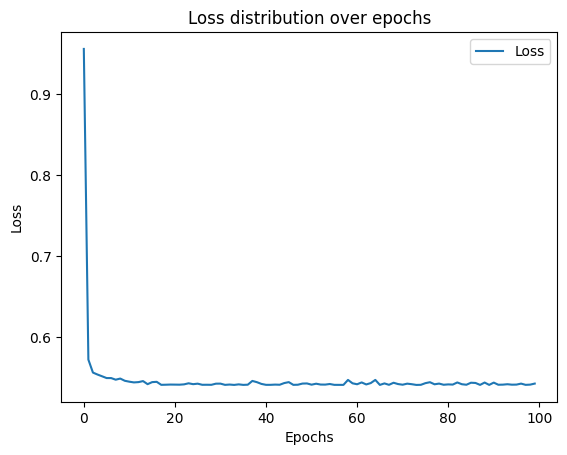

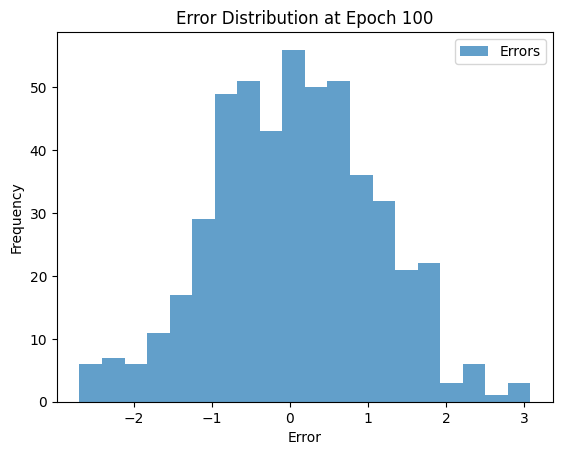

In [4]:
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term - это свободный член в уравнении модели, который не зависит от входных признаков.
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(X_b,y,100)

**L2 регуляризация**

     Разные значения learning rate 

Training with learning rate: 0.001
Training with learning rate: 0.006
Training with learning rate: 0.01
Training with learning rate: 0.1


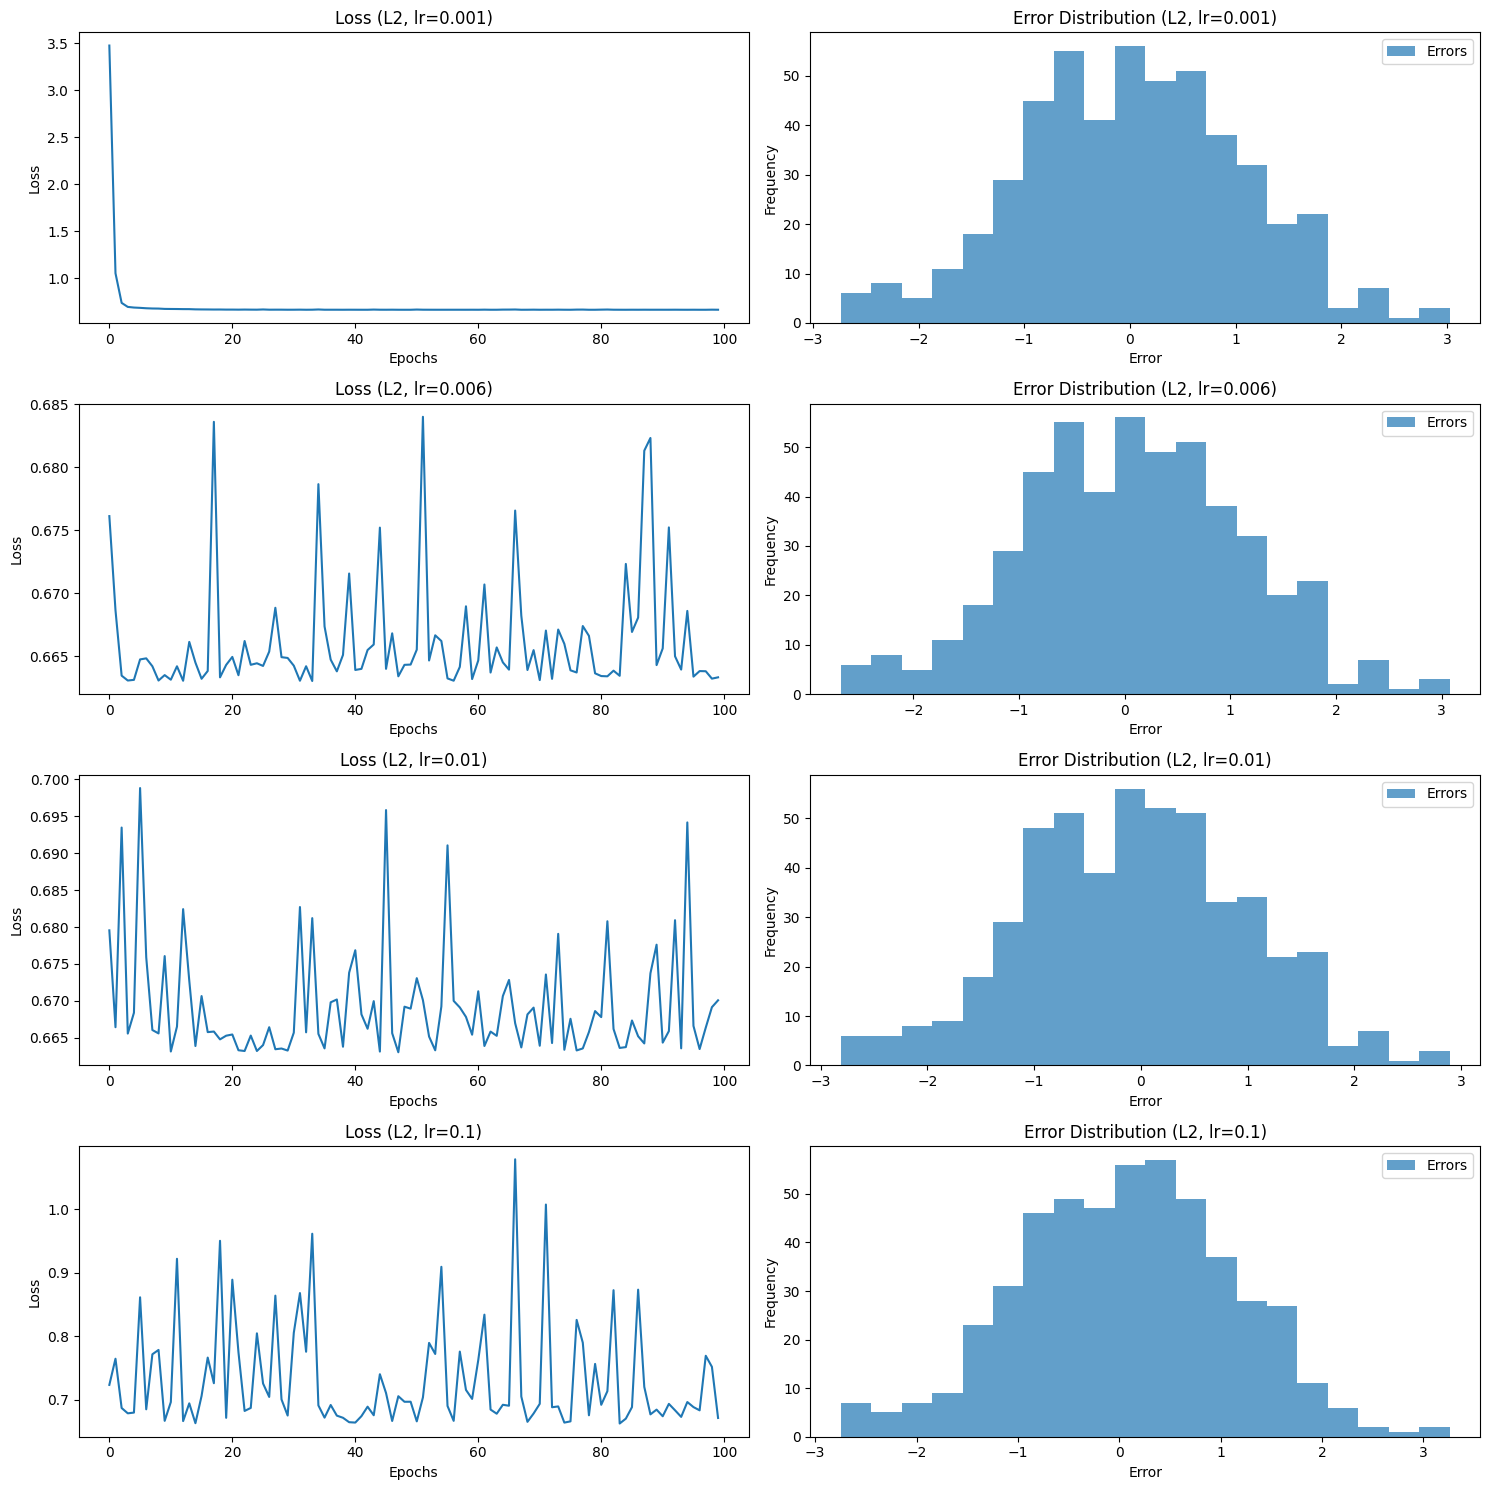

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Список значений learning rate
learning_rates = [0.001,0.006, 0.01, 0.1]

# Проходим по каждому значению learning rate
for i, lr in enumerate(learning_rates):
    print(f"Training with learning rate: {lr}")
    
    model = LinearRegressionSGD(lr=lr, reg_type='l2', epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (L2, lr={lr})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (L2, lr={lr})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


Явно видно что при шаге : 0.006,0.01 и  0.1 график лосса сильно скажет - значит слишком большой шаг

Для 0.001  график выходит на плато , значит шаг оптимальный

Распредение ошибок более менее нормальное

    Разные значения reg_lambda

Training with  reg_lambda: 0.01
Training with  reg_lambda: 0.05
Training with  reg_lambda: 0.1
Training with  reg_lambda: 0.5
Training with  reg_lambda: 1


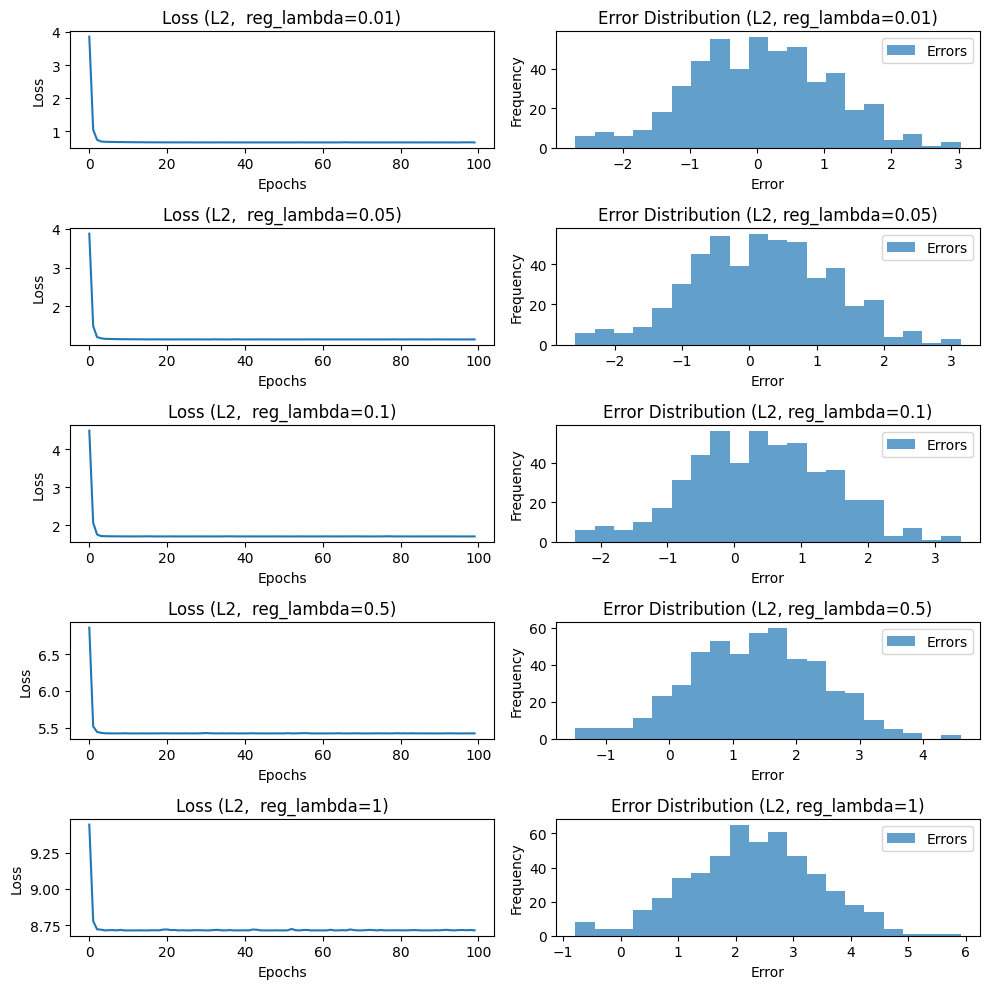

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
# Список значений reg_lambda
reg_lambda =  [0.01,0.05, 0.1, 0.5, 1]

# Проходим по каждому значению reg_lambda

for i, reg in enumerate(reg_lambda):
    print(f"Training with  reg_lambda: {reg}")
    
    model = LinearRegressionSGD( reg_lambda=reg, reg_type='l2', lr = 0.001,epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (L2,  reg_lambda={reg})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (L2, reg_lambda={reg})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

При всех значениях лямбы лосс на плато


**L1 регуляризация**

      Разные значения learning rate 

Training with learning rate: 0.001
Training with learning rate: 0.006
Training with learning rate: 0.01
Training with learning rate: 0.1


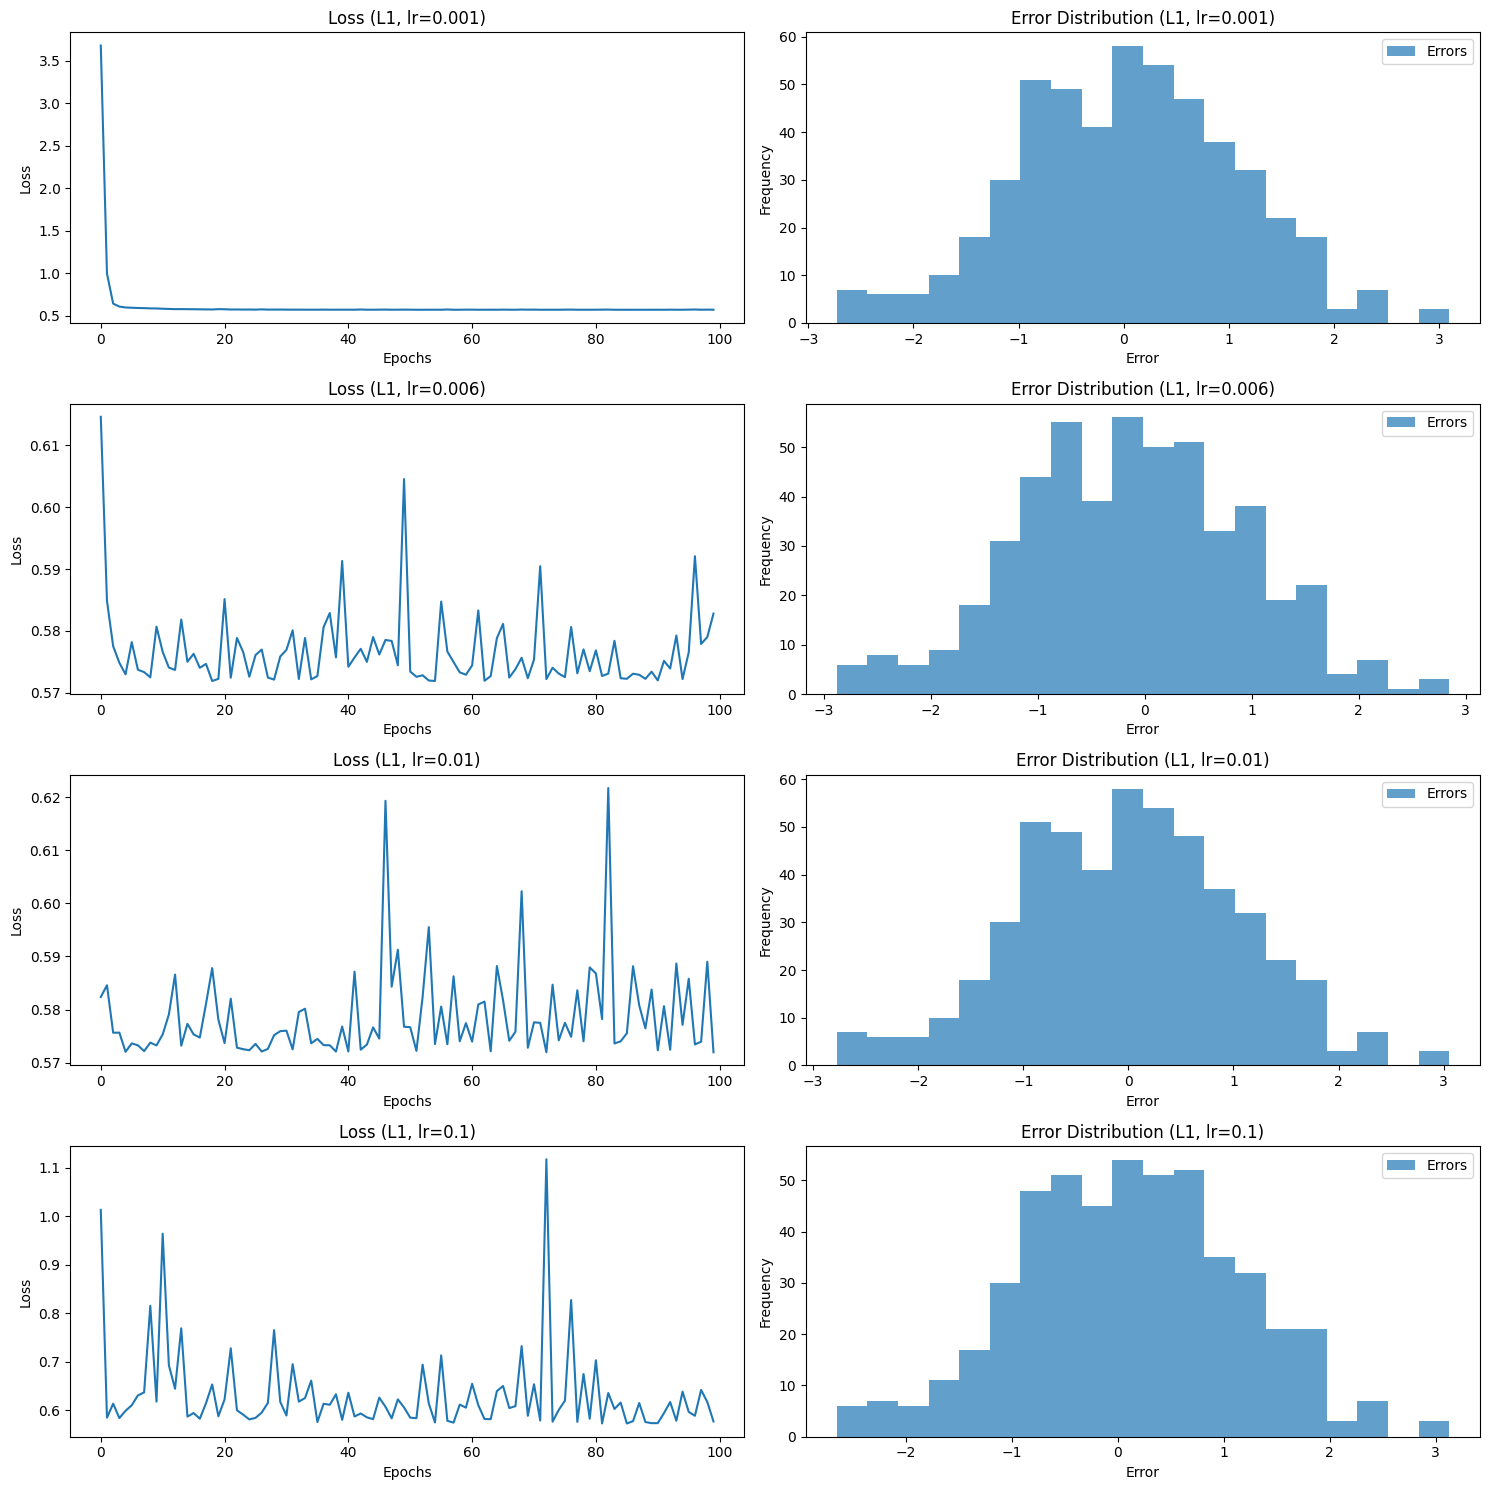

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Список значений learning rate
learning_rates = [0.001,0.006, 0.01, 0.1]

# Проходим по каждому значению learning rate
for i, lr in enumerate(learning_rates):
    print(f"Training with learning rate: {lr}")
    
    model = LinearRegressionSGD(lr=lr, reg_type='l1',epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (L1, lr={lr})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (L1, lr={lr})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


Явно видно что при шаге : 0.006,0.01 и  0.1 график лосса сильно скажет - значит слишком большой шаг

Для 0.001  график выходит на плато , значит шаг оптимальный

Распредение ошибок более менее нормальное

    Разные значения reg_lambda

Training with  reg_lambda: 0.01
Training with  reg_lambda: 0.05
Training with  reg_lambda: 0.1
Training with  reg_lambda: 0.5
Training with  reg_lambda: 1


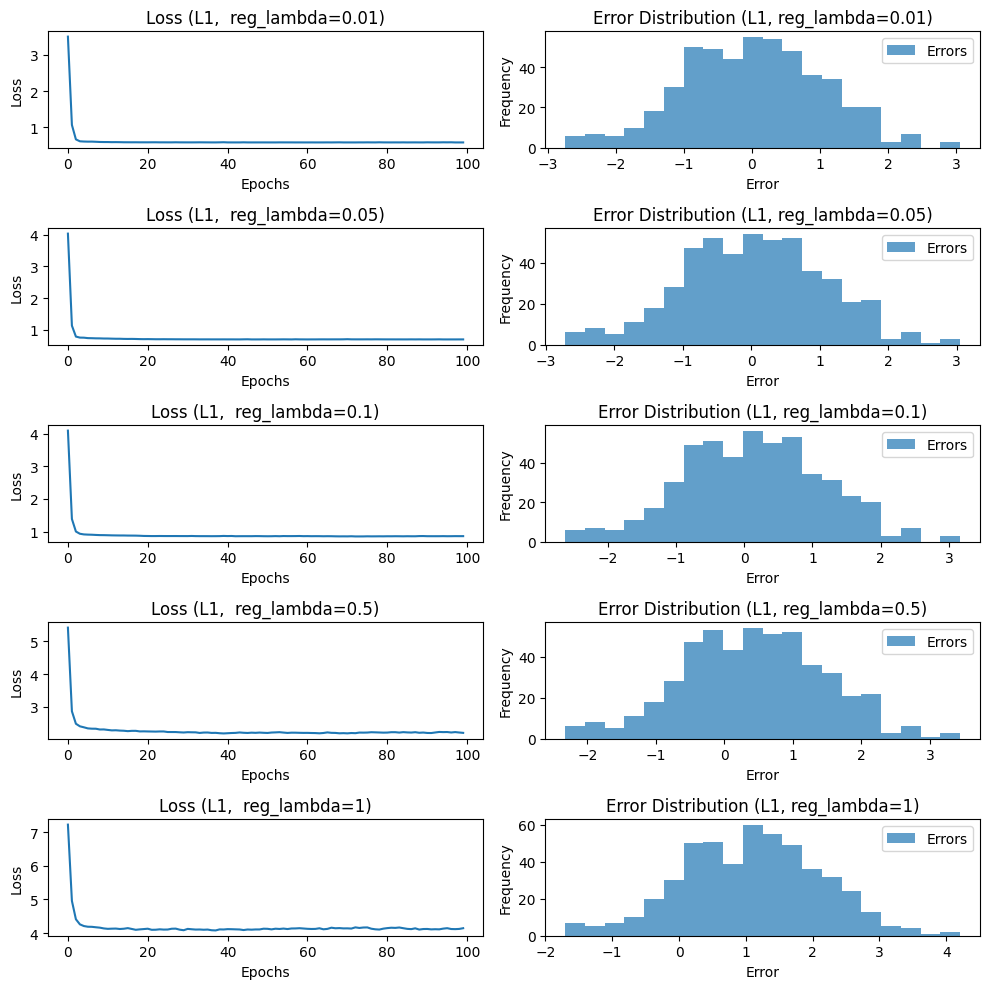

In [28]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
# Список значений reg_lambda
reg_lambda =  [0.01,0.05, 0.1, 0.5, 1]

# Проходим по каждому значению reg_lambda

for i, reg in enumerate(reg_lambda):
    print(f"Training with  reg_lambda: {reg}")
    
    model = LinearRegressionSGD( reg_lambda=reg, reg_type='l1', lr = 0.001,epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (L1,  reg_lambda={reg})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (L1, reg_lambda={reg})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

все лямбды хороши

**Elastic Net**

      Подбор learning rate

Training with learning rate: 0.001
Training with learning rate: 0.006
Training with learning rate: 0.01
Training with learning rate: 0.1


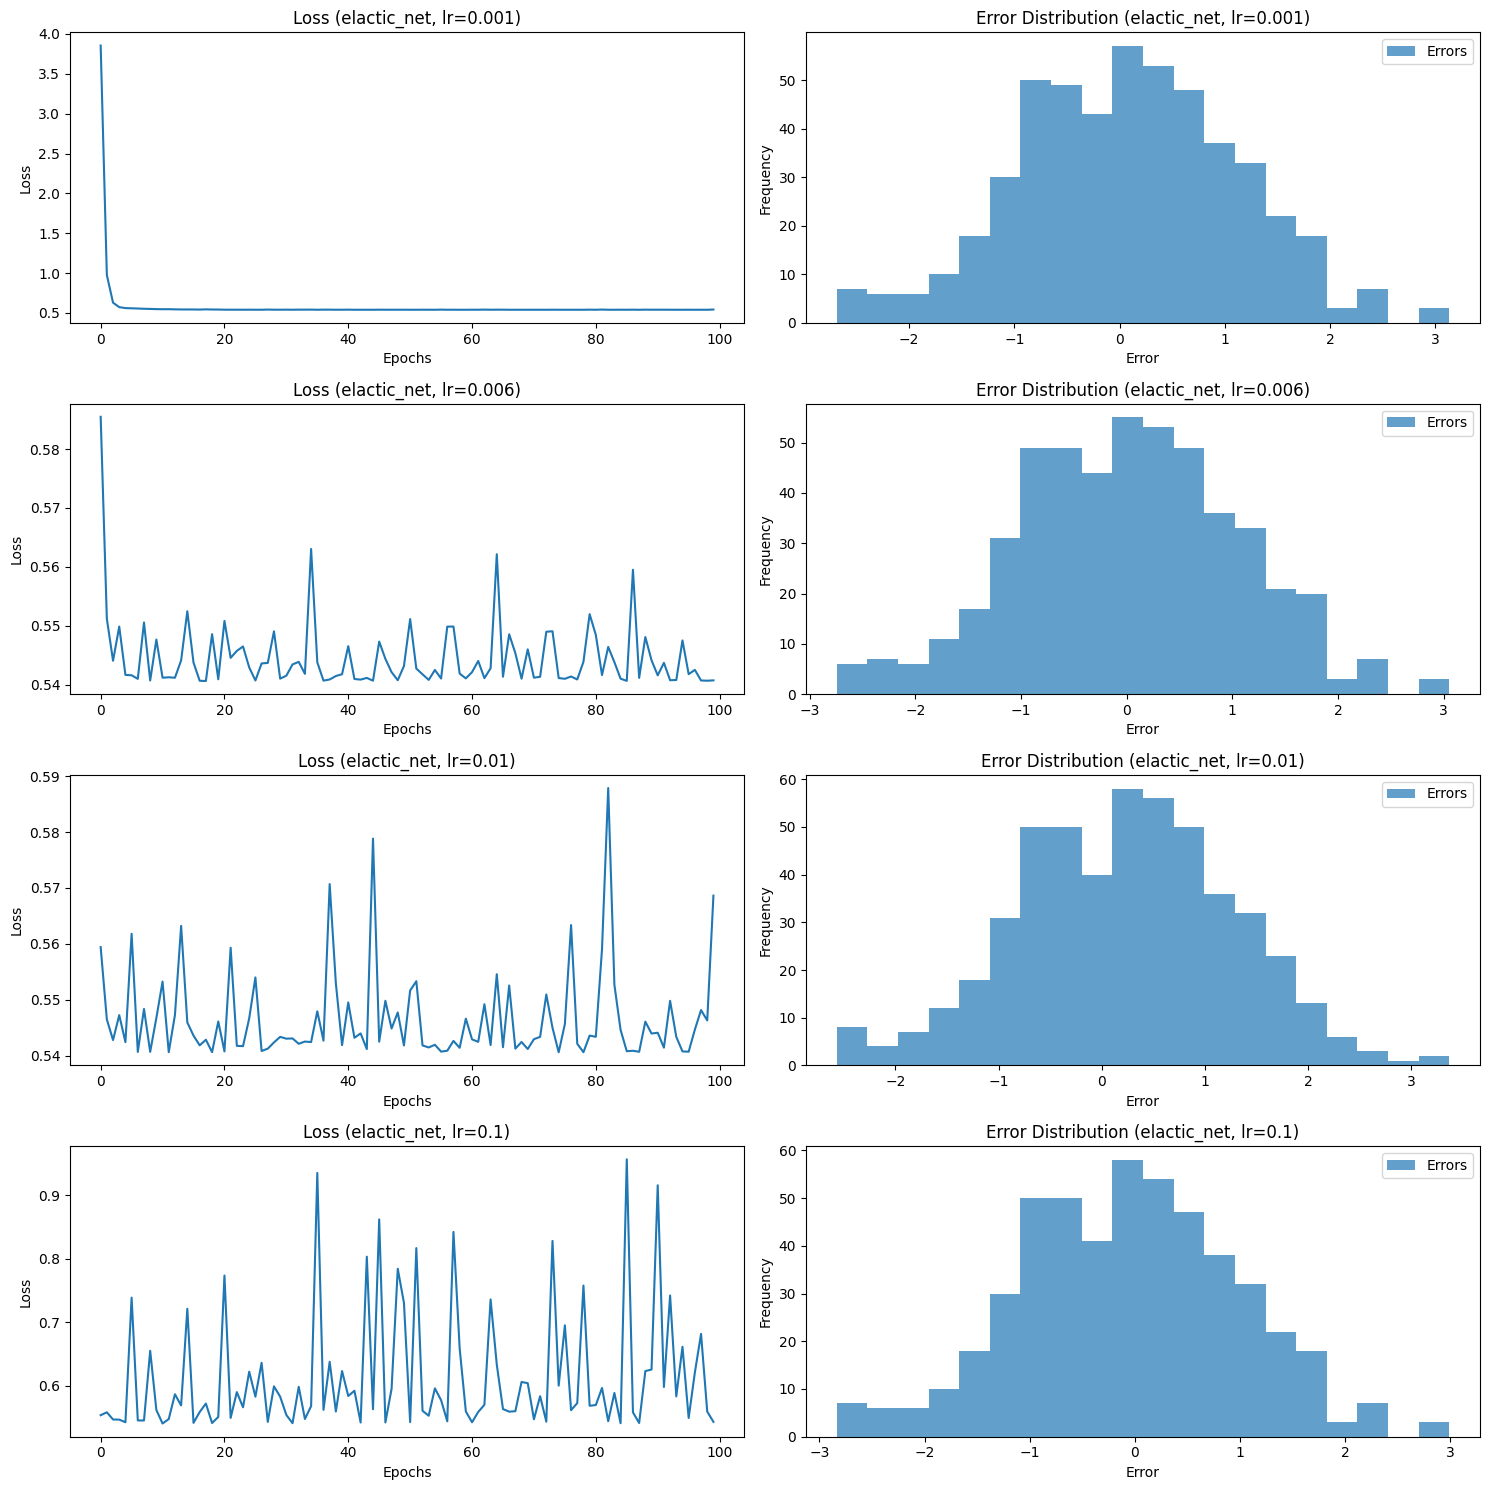

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Список значений learning rate
learning_rates = [0.001,0.006, 0.01, 0.1]

# Проходим по каждому значению learning rate
for i, lr in enumerate(learning_rates):
    print(f"Training with learning rate: {lr}")
    
    model = LinearRegressionSGD(lr=lr, reg_type='elactic_net',epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (elactic_net, lr={lr})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (elactic_net, lr={lr})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

0.001 - лучший шаг

     Подбор reg_lambda

Training with  reg_lambda: 0.01
Training with  reg_lambda: 0.05
Training with  reg_lambda: 0.1
Training with  reg_lambda: 0.5
Training with  reg_lambda: 1


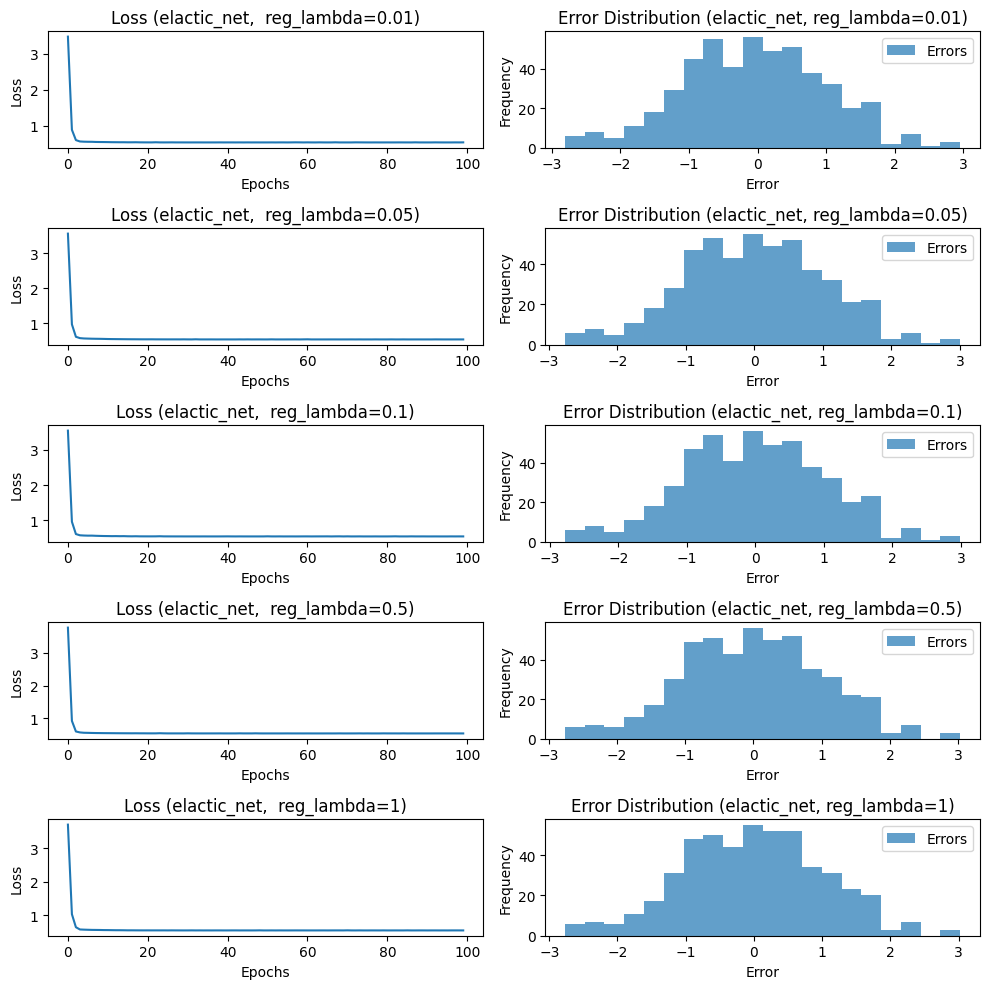

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
# Список значений reg_lambda
reg_lambda =  [0.01,0.05, 0.1, 0.5, 1]

# Проходим по каждому значению reg_lambda

for i, reg in enumerate(reg_lambda):
    print(f"Training with  reg_lambda: {reg}")
    
    model = LinearRegressionSGD( reg_lambda=reg, reg_type='elactic_net', lr = 0.001,epochs=100)
    model.fit(X_b, y)
    
    axes[i, 0].plot(model.loss_history)
    axes[i, 0].set_title(f"Loss (elactic_net,  reg_lambda={reg})")
    axes[i, 0].set_xlabel("Epochs")
    axes[i, 0].set_ylabel("Loss")
    
    # Распределение ошибок
    predictions = model.predict(X_b)
    errors = y - predictions
    axes[i, 1].hist(errors, bins=20, alpha=0.7, label='Errors')
    axes[i, 1].set_title(f"Error Distribution (elactic_net, reg_lambda={reg})")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

## Часть 3. (15 баллов)

**Разбейте ваши данные** на две части в процентном соотношении 80/20, используя функцию `train_test_split` из `scikit-learn`. Первую часть используйте как **тренировочную выборку**, а а вторую - как **тестовую**.

Посмотрите, **как меняются значения лоссов** на тренировочной и тестовой выборке в процессе обучения. Какие модели больше переобучаются, а какие меньше?

*Если вы не понимаете как разбить вашу выборку, посмотрите другой файл домашки `hw3_data_analysis.ipynb`*

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegressionSGD(lr=0.001, epochs=1000, reg_lambda=0.5, alpha=0.5)

# Списки для хранения лоссов
train_loss_history = []
test_loss_history = []

# Процесс обучения
for epoch in range(model.epochs):
    # Обучаем модель на тренировочной выборке
    model.fit(X_train, y_train)
    
    # Вычисляем лосс на тренировочной выборке
    train_loss = model._compute_loss(X_train, y_train)
    train_loss_history.append(train_loss)
    
    # Вычисляем лосс на тестовой выборке
    if X_test is not None and y_test is not None:
        test_loss = model._compute_loss(X_test, y_test)
        test_loss_history.append(test_loss)


plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.show()

**Отлично! Вы дошли до конца этой сложной части третьей домашки!**

Вы уже поняли, что мы ждём ваши впечатления. Особенно важно то, сколько времени у вас заняла эта часть. Нравятся ли вам задания с собственной реализацией методов и классов?

In [ ]:
# Немного непонятная фомулировка 3его задания( не сразу понятно на ком и кто обучается , что мы строим, очень долго обсуждали что вообще от нас хотят здесь))

## Давайте следующий вопрос

Вставьте картинку, которая ассоциируется с вашим **любимым путешествием**. Пусть это будут горы или озёра, или любимая кафешка за пределами города, или фотка дома с котом, где вы провели какое-нибудь лето. Что угодно, где вам было комфортно и от чего у вас возникают тёплые воспоминания.

In [ ]:
#Лежит в папке дата